<h4>Notebook demonstrating the loading of data from a remote CSV file, and plotting the data on a pie chart broken down by email domain.</h4>

Author - Cian Gallagher


[]

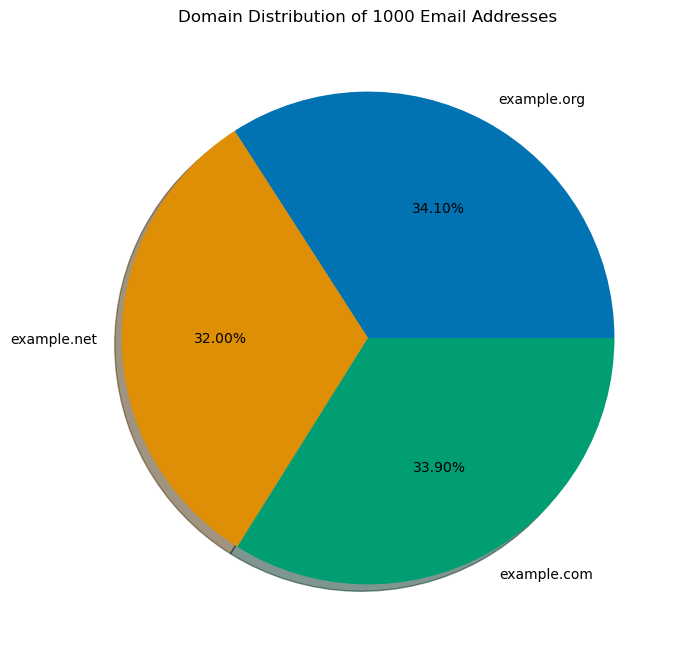

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download")
# Uncomment the following line to see the entire dataframe.
# df 

# Filtering down columns
# email_col = df.loc[:,"Email"] - This line includes index which isn't needed in our use case.
email_col = df["Email"]

# Loop that slices up the email strings on the @ character and stores the characters after @ in a list.
email_domains = []
for email in email_col:
    domain = email.split("@")[1]
    email_domains.append(domain)   
    
# Loop that counts email_domains elements, if the key(domain) exists, add 1 to the value of that key, else add the key and set the value to 1.
domain_counts = {}
for domain in email_domains:
    if domain in domain_counts:
        domain_counts[domain] += 1
    else:
        domain_counts[domain] = 1

# Uncomment the following line to see the 3 domains with the count of their values in a dict.
# domain_counts

# Needed to convert to a list as .keys() & .values() both return objects. plt.pie expects list like structures.
domain_counts_keys = list(domain_counts.keys())
domain_counts_values = list(domain_counts.values())

plt.figure(figsize=(8,8))
plt.pie(domain_counts_values, labels = domain_counts_keys, autopct='%1.2f%%', colors=sns.color_palette('colorblind'), shadow=True)
plt.title('Domain Distribution of 1000 Email Addresses')
#plt.legend()
plt.plot()